In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#import the data
data = pd.read_csv("ukraine-damages.csv", delimiter = "|")
data

,damage_id,iso3,country,gid_1,oblast,rayon,type_of_infrastructure,if_other_what,date_of_event,source_name,source_date,source_link,additional_sources,extent_of_damage,_internal_filter_date,_weights,access_subindicator,pcode
0,D0011,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-25,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-25,0.7,['7.2'],UA44
1,D0012,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Partially damaged,2022-03-26,0.7,['7.2'],UA44
2,D0015,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Unknown,2022-03-26,1.0,['7.2'],UA46
3,D0016,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Aircraft repair plant,Aircraft repair plan,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-26,1.0,['7.2'],UA46
4,D0017,UKR,Ukraine,['UKR.12_1'],Kyivska,NaN,Bridge,NaN,2022-03-22,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-22,1.0,['9.2'],UA32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24264,D9995,UKR,Ukraine,['UKR.9_1'],Khersonska,Khersonskyi,"Health facility (hospital, health clinic)",NaN,2023-04-03,MagnoliaTV,2023-04-04,https://magnolia-tv.com/news/88335-khersonska-...,NaN,Partially damaged,2023-04-03,0.7,['7.2'],UA65
24265,D9996,UKR,Ukraine,['UKR.17_1'],Odeska,Odeskyi,Industrial/Business/Enterprise facilities,NaN,2023-04-04,Baltanews,2023-04-04,https://baltanews.city/articles/276787/vorog-a...,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA51
24266,D9997,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Industrial/Business/Enterprise facilities,the mine,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14
24267,D9998,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Government facilities,NaN,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14


In [20]:
#Oblast is the region
#Rayon is the district within the region
#I think it makes the most sense to model at the Rayon level as these are smaller than Oblasts
#how many rayon are NaN?
a = data['rayon'].isna().sum()
b = data['rayon'].value_counts()
a,b


(np.int64(8720),
 rayon
 Nikopolskyi     2474
 Kramatorskyi    2274
 Kharkivskyi     1308
 Khersonskyi     1187
 Pokrovskyi       733
                 ... 
 Khmilnytskyi       1
 Yaltynskyi         1
 Zhmerynskyi        1
 Sambirskyi         1
 Kovelskyi          1
 Name: count, Length: 113, dtype: int64)

In [21]:
missing_r = (8720/24269)*100
missing_r

35.93061106761712

Having 35% of the rayons missing kinda stinks...

Let evaluate the oblasts for missingness

In [22]:
#how many oblasts are NaN?
c = data['oblast'].isna().sum()
d = data['oblast'].value_counts()
c,d

(np.int64(8),
 oblast
 Donetska                         6095
 Dnipropetrovska                  4053
 Kharkivska                       3393
 Khersonska                       2305
 Mykolaivska                      2110
 Sumska                           1540
 Zaporizka                         803
 Odeska                            671
 Kyivska                           645
 Luhanska                          588
 Chernihivska                      516
 Kyiv                              498
 Zhytomyrska                       204
 Khmelnytska                       177
 Poltavska                         148
 Cherkaska                         133
 Lvivska                           128
 Kirovohradska                      67
 Vinnytska                          53
 Ternopilska                        37
 Rivnenska                          22
 Ivano-Frankivska                   19
 Volynska                           16
 Autonomous Republic of Crimea      16
 Zakarpatska                        12
 Ch

In [23]:
missing_o = (8/24269)*100
missing_o

0.03296386336478636

Having only .03% missing is much more tolerable

I'll continue the code using the Oblasts vs the Rayons but this can be revised later, maybe we can fill NaN vlaues with the corresponding Oblast for missing 
Rayons?

Group met on 11/11 proposed to change NaN values to 'Unknown'

# Old Code:
```
#Trim data to only include Oblasts that are not missing
#Expecting 24261 rows
trimmed_data = data[data['oblast'].notna()]
trimmed_data
```

In [34]:
#Convert missing values to 'Unknown'
data['rayon'] = data['rayon'].fillna('Missing')
data['oblast'] = data['oblast'].fillna('Unknown')
data

,damage_id,iso3,country,gid_1,oblast,rayon,type_of_infrastructure,if_other_what,date_of_event,source_name,source_date,source_link,additional_sources,extent_of_damage,_internal_filter_date,_weights,access_subindicator,pcode
0,D0011,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-25,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-25,0.7,['7.2'],UA44
1,D0012,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Partially damaged,2022-03-26,0.7,['7.2'],UA44
2,D0015,UKR,Ukraine,['UKR.14_1'],Lvivska,Missing,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Unknown,2022-03-26,1.0,['7.2'],UA46
3,D0016,UKR,Ukraine,['UKR.14_1'],Lvivska,Missing,Aircraft repair plant,Aircraft repair plan,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-26,1.0,['7.2'],UA46
4,D0017,UKR,Ukraine,['UKR.12_1'],Kyivska,Missing,Bridge,NaN,2022-03-22,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-22,1.0,['9.2'],UA32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24264,D9995,UKR,Ukraine,['UKR.9_1'],Khersonska,Khersonskyi,"Health facility (hospital, health clinic)",NaN,2023-04-03,MagnoliaTV,2023-04-04,https://magnolia-tv.com/news/88335-khersonska-...,NaN,Partially damaged,2023-04-03,0.7,['7.2'],UA65
24265,D9996,UKR,Ukraine,['UKR.17_1'],Odeska,Odeskyi,Industrial/Business/Enterprise facilities,NaN,2023-04-04,Baltanews,2023-04-04,https://baltanews.city/articles/276787/vorog-a...,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA51
24266,D9997,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Industrial/Business/Enterprise facilities,the mine,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14
24267,D9998,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Government facilities,NaN,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14


In [35]:
oblasts = data[['oblast']].copy()
oblasts.reset_index(drop=True, inplace=True)
oblasts

,oblast
0,Luhanska
1,Luhanska
2,Lvivska
3,Lvivska
4,Kyivska
...,...
24264,Khersonska
24265,Odeska
24266,Donetska
24267,Donetska


In [36]:
#get unique oblasts for the States
states = set(oblasts.iloc[0])
for i in range(1, len(oblasts)):
    transition_i = set(oblasts.iloc[i])
    states = states.union(transition_i)
states = list(states)
states

['Khmelnytska',
 'Mykolaivska',
 'Luhanska',
 'Cherkaska',
 'Dnipropetrovska',
 'Unknown',
 'Kyivska',
 'Chernihivska',
 'Odeska',
 'Khersonska',
 'Ternopilska',
 'Autonomous Republic of Crimea',
 'Chernivetska',
 'Ivano-Frankivska',
 'Rivnenska',
 'Poltavska',
 'Kyiv',
 'Kharkivska',
 'Sevastopol',
 'Zhytomyrska',
 'Donetska',
 'Zaporizka',
 'Sumska',
 'Lvivska',
 'Zakarpatska',
 'Vinnytska',
 'Volynska',
 'Kirovohradska']

In [37]:
#Now we need to modify the oblast df so the next oblast is in a new column "next_oblast"
oblasts['Current_State'] = oblasts['oblast']
oblasts['Next_State'] = oblasts['oblast'].shift(-1)
oblast_transition = oblasts.dropna(subset=['Next_State'])
oblast_transition

,oblast,Current_State,Next_State
0,Luhanska,Luhanska,Luhanska
1,Luhanska,Luhanska,Lvivska
2,Lvivska,Lvivska,Lvivska
3,Lvivska,Lvivska,Kyivska
4,Kyivska,Kyivska,Chernihivska
...,...,...,...
24263,Khersonska,Khersonska,Khersonska
24264,Khersonska,Khersonska,Odeska
24265,Odeska,Odeska,Donetska
24266,Donetska,Donetska,Donetska


In [38]:
#Setting up the transition matrix
#S is the number of states
#tr_counts is the transition count matrix filled with zeros
S = len(states)
tr_counts = np.zeros( (S, S) )

In [39]:
#Fill the transition count matrix
for i in range(len(oblast_transition)):
    current_state = oblast_transition.iloc[i]['Current_State']
    next_state = oblast_transition.iloc[i]['Next_State']
    
    current_index = states.index(current_state)
    next_index = states.index(next_state)
    
    tr_counts[current_index, next_index] += 1
print("Transition Counts Matrix:\n", tr_counts)

Transition Counts Matrix:
 [[1.100e+02 2.000e+00 2.000e+00 2.000e+00 8.000e+00 0.000e+00 4.000e+00
  1.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 1.000e+00 0.000e+00 1.600e+01 0.000e+00 1.000e+00 1.000e+01
  2.000e+00 1.200e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 1.792e+03 1.200e+01 4.000e+00 4.300e+01 0.000e+00 6.000e+00
  6.000e+00 1.400e+01 8.500e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 6.000e+00 4.000e+01 0.000e+00 2.000e+00 6.300e+01
  1.100e+01 2.200e+01 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.300e+01 3.290e+02 1.000e+00 5.000e+01 0.000e+00 4.000e+00
  7.000e+00 2.000e+00 2.300e+01 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  2.000e+00 3.000e+00 7.000e+00 4.800e+01 0.000e+00 0.000e+00 8.300e+01
  4.000e+00 4.000e+00 4.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 1.000e+00 3.000e+00 3.500e+01 1.500e+01 0.000e+00 1.000e+00
  1.000e+00 3.000e+00 1.200e+01 0.

In [40]:
#Now we need to normalize the transition counts to get probabilities
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[1.770e+02 2.110e+03 5.870e+02 1.330e+02 4.053e+03 8.000e+00 6.450e+02
  5.160e+02 6.710e+02 2.305e+03 3.700e+01 1.600e+01 7.000e+00 1.900e+01
  2.200e+01 1.480e+02 4.980e+02 3.393e+03 5.000e+00 2.040e+02 6.095e+03
  8.030e+02 1.540e+03 1.280e+02 1.200e+01 5.300e+01 1.600e+01 6.700e+01]]


In [41]:
#Continue to normalize by dividing each element by the sum of its column make sure we dont divide by zero
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

Transition Proportions:

                               Khmelnytska  Mykolaivska  Luhanska  Cherkaska  \
Khmelnytska                           0.62         0.00      0.00       0.02   
Mykolaivska                           0.01         0.85      0.02       0.03   
Luhanska                              0.01         0.01      0.56       0.01   
Cherkaska                             0.00         0.00      0.01       0.26   
Dnipropetrovska                       0.05         0.02      0.06       0.11   
Unknown                               0.00         0.00      0.00       0.01   
Kyivska                               0.01         0.00      0.01       0.05   
Chernihivska                          0.01         0.00      0.00       0.01   
Odeska                                0.01         0.01      0.01       0.04   
Khersonska                            0.06         0.02      0.04       0.11   
Ternopilska                           0.01         0.00      0.00       0.00   
Autonomous Repu

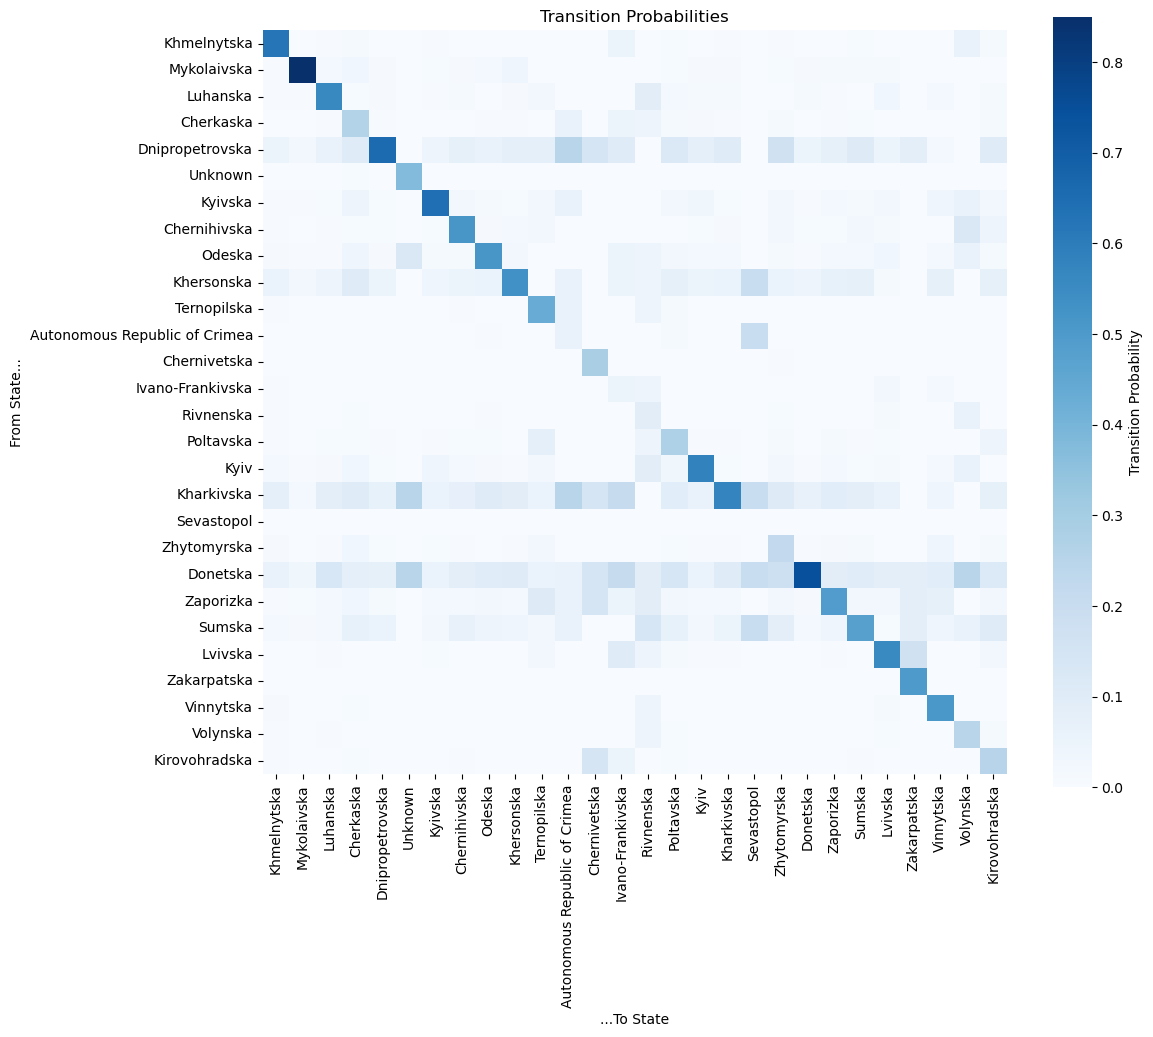

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Based on this the most likely state to transition to is the Oblast youre already in.

# Rayon Markov Chain

In [43]:
rayon = data[['rayon']].copy()
rayon.reset_index(drop=True, inplace=True)
rayon

,rayon
0,Siverskodonetskyi
1,Siverskodonetskyi
2,Missing
3,Missing
4,Missing
...,...
24264,Khersonskyi
24265,Odeskyi
24266,Bakhmutskyi
24267,Bakhmutskyi


In [45]:
#get unique rayons for the States space
ray_states = set(rayon.iloc[0])
for i in range(1, len(rayon)):
    transition_i = set(rayon.iloc[i])
    ray_states = ray_states.union(transition_i)
ray_states = list(ray_states)
ray_states

['Skadovskyi',
 'Kamianets-Podilskyi',
 'Bilotserkivskyi',
 'Lubenskyi',
 'Chuhuivskyi',
 'Sheptytskyi',
 'Shostkynskyi',
 'Buchanskyi',
 'Pervomaiskyi',
 'Kryvorizkyi',
 'Mykolaivskyi',
 'Horlivskyi',
 'Sumskyi',
 'Lozivskyi',
 'Khmilnytskyi',
 'Odeskyi',
 'Bilhorod-Dnistrovskyi',
 'Kovelskyi',
 'Umanskyi',
 'Iziumskyi',
 'Berestynskyi',
 'Nizhynskyi',
 'Boryspilskyi',
 'Brovarskyi',
 'Synelnykivskyi',
 'Stryiskyi',
 'Kramatorskyi',
 'Feodosiiskyi',
 'Chornobylska zona vidchuzhennia',
 'Luhanskyi',
 'Zhytomyrskyi',
 'Kaluskyi',
 'Samarivskyi',
 'Nikopolskyi',
 'Kerchenskyi',
 'Zhmerynskyi',
 'Mariupolskyi',
 'Cherkaskyi',
 'Shepetivskyi',
 'Zaporizkyi',
 'Drohobytskyi',
 'Lutskyi',
 'Prylutskyi',
 'Chortkivskyi',
 'Kupianskyi',
 'Yaltynskyi',
 'Polohivskyi',
 'Shchastynskyi',
 'Melitopolskyi',
 'Kamianskyi',
 'Izmailskyi',
 'Khersonskyi',
 'Voznesenskyi',
 'Oleksandriiskyi',
 'Obukhivskyi',
 'Pokrovskyi',
 'Simferopolskyi',
 'Berdianskyi',
 'Podilskyi',
 'Kharkivskyi',
 'Siverskodonet

In [ ]:
#Now we need to modify the rayon df so the next rayon is in a new column "next_state"
rayon['Current_State'] = rayon['rayon']
rayon['Next_State'] = rayon['rayon'].shift(-1)
rayon_transition = rayon.dropna(subset=['Next_State'])
rayon_transition

,rayon,Current_State,Next_State
0,Siverskodonetskyi,Siverskodonetskyi,Siverskodonetskyi
1,Siverskodonetskyi,Siverskodonetskyi,Missing
2,Missing,Missing,Missing
3,Missing,Missing,Missing
4,Missing,Missing,Missing
...,...,...,...
24263,Beryslavskyi,Beryslavskyi,Khersonskyi
24264,Khersonskyi,Khersonskyi,Odeskyi
24265,Odeskyi,Odeskyi,Bakhmutskyi
24266,Bakhmutskyi,Bakhmutskyi,Bakhmutskyi


In [47]:
#Setting up the transition matrix
#S is the number of states
#tr_counts is the transition count matrix filled with zeros
S = len(ray_states)
tr_counts = np.zeros( (S, S) )

In [48]:
#Fill the transition count matrix
for i in range(len(rayon_transition)):
    current_state = rayon_transition.iloc[i]['Current_State']
    next_state = rayon_transition.iloc[i]['Next_State']
    
    current_index = ray_states.index(current_state)
    next_index = ray_states.index(next_state)
    
    tr_counts[current_index, next_index] += 1
print("Transition Counts Matrix:\n", tr_counts)

Transition Counts Matrix:
 [[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   5. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 196.   0.   0.]
 [  0.   0.   0. ...   0.   5.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [49]:
#Now we need to normalize the transition counts to get probabilities
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[1.000e+00 1.000e+00 1.900e+01 4.000e+00 2.860e+02 1.000e+00 3.040e+02
  3.600e+01 6.000e+00 4.660e+02 3.080e+02 2.000e+01 6.450e+02 4.800e+01
  1.000e+00 4.460e+02 6.000e+01 1.000e+00 2.000e+01 2.850e+02 1.100e+01
  2.100e+01 3.800e+01 3.100e+01 3.290e+02 4.000e+00 2.274e+03 4.000e+00
  1.000e+00 8.000e+00 1.300e+01 1.000e+00 2.200e+01 2.474e+03 4.000e+00
  1.000e+00 5.300e+01 5.800e+01 4.000e+01 3.550e+02 6.000e+00 1.400e+01
  2.000e+01 4.000e+00 4.730e+02 1.000e+00 7.400e+01 6.000e+00 1.700e+01
  3.400e+01 5.900e+01 1.187e+03 9.000e+00 7.000e+00 2.000e+01 7.330e+02
  2.000e+00 1.300e+01 3.000e+00 1.308e+03 1.600e+02 1.000e+00 8.100e+01
  3.800e+01 1.300e+01 2.780e+02 1.340e+02 3.000e+00 3.000e+01 1.300e+01
  2.000e+00 2.700e+01 2.000e+01 3.550e+02 1.100e+01 3.000e+00 5.000e+00
  7.000e+00 1.890e+02 3.000e+00 1.000e+01 1.080e+02 9.700e+01 2.600e+01
  8.720e+03 2.000e+00 1.000e+00 7.300e+01 3.000e+00 1.100e+02 1.200e+01
  1.300e+01 3.700e+01 4.900e+01 2.000e+00 4

In [50]:
#Continue to normalize by dividing each element by the sum of its column make sure we dont divide by zero
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=ray_states, columns=ray_states)
print(tr_df)

Transition Proportions:

                     Skadovskyi  Kamianets-Podilskyi  Bilotserkivskyi  \
Skadovskyi                  0.0                  0.0             0.00   
Kamianets-Podilskyi         0.0                  0.0             0.00   
Bilotserkivskyi             0.0                  0.0             0.26   
Lubenskyi                   0.0                  0.0             0.00   
Chuhuivskyi                 0.0                  0.0             0.00   
...                         ...                  ...              ...   
Chernihivskyi               0.0                  0.0             0.05   
Vasylivskyi                 0.0                  0.0             0.00   
Dniprovskyi                 0.0                  0.0             0.00   
Mukachivskyi                0.0                  0.0             0.00   
Bakhchysaraiskyi            0.0                  0.0             0.00   

                     Lubenskyi  Chuhuivskyi  Sheptytskyi  Shostkynskyi  \
Skadovskyi              

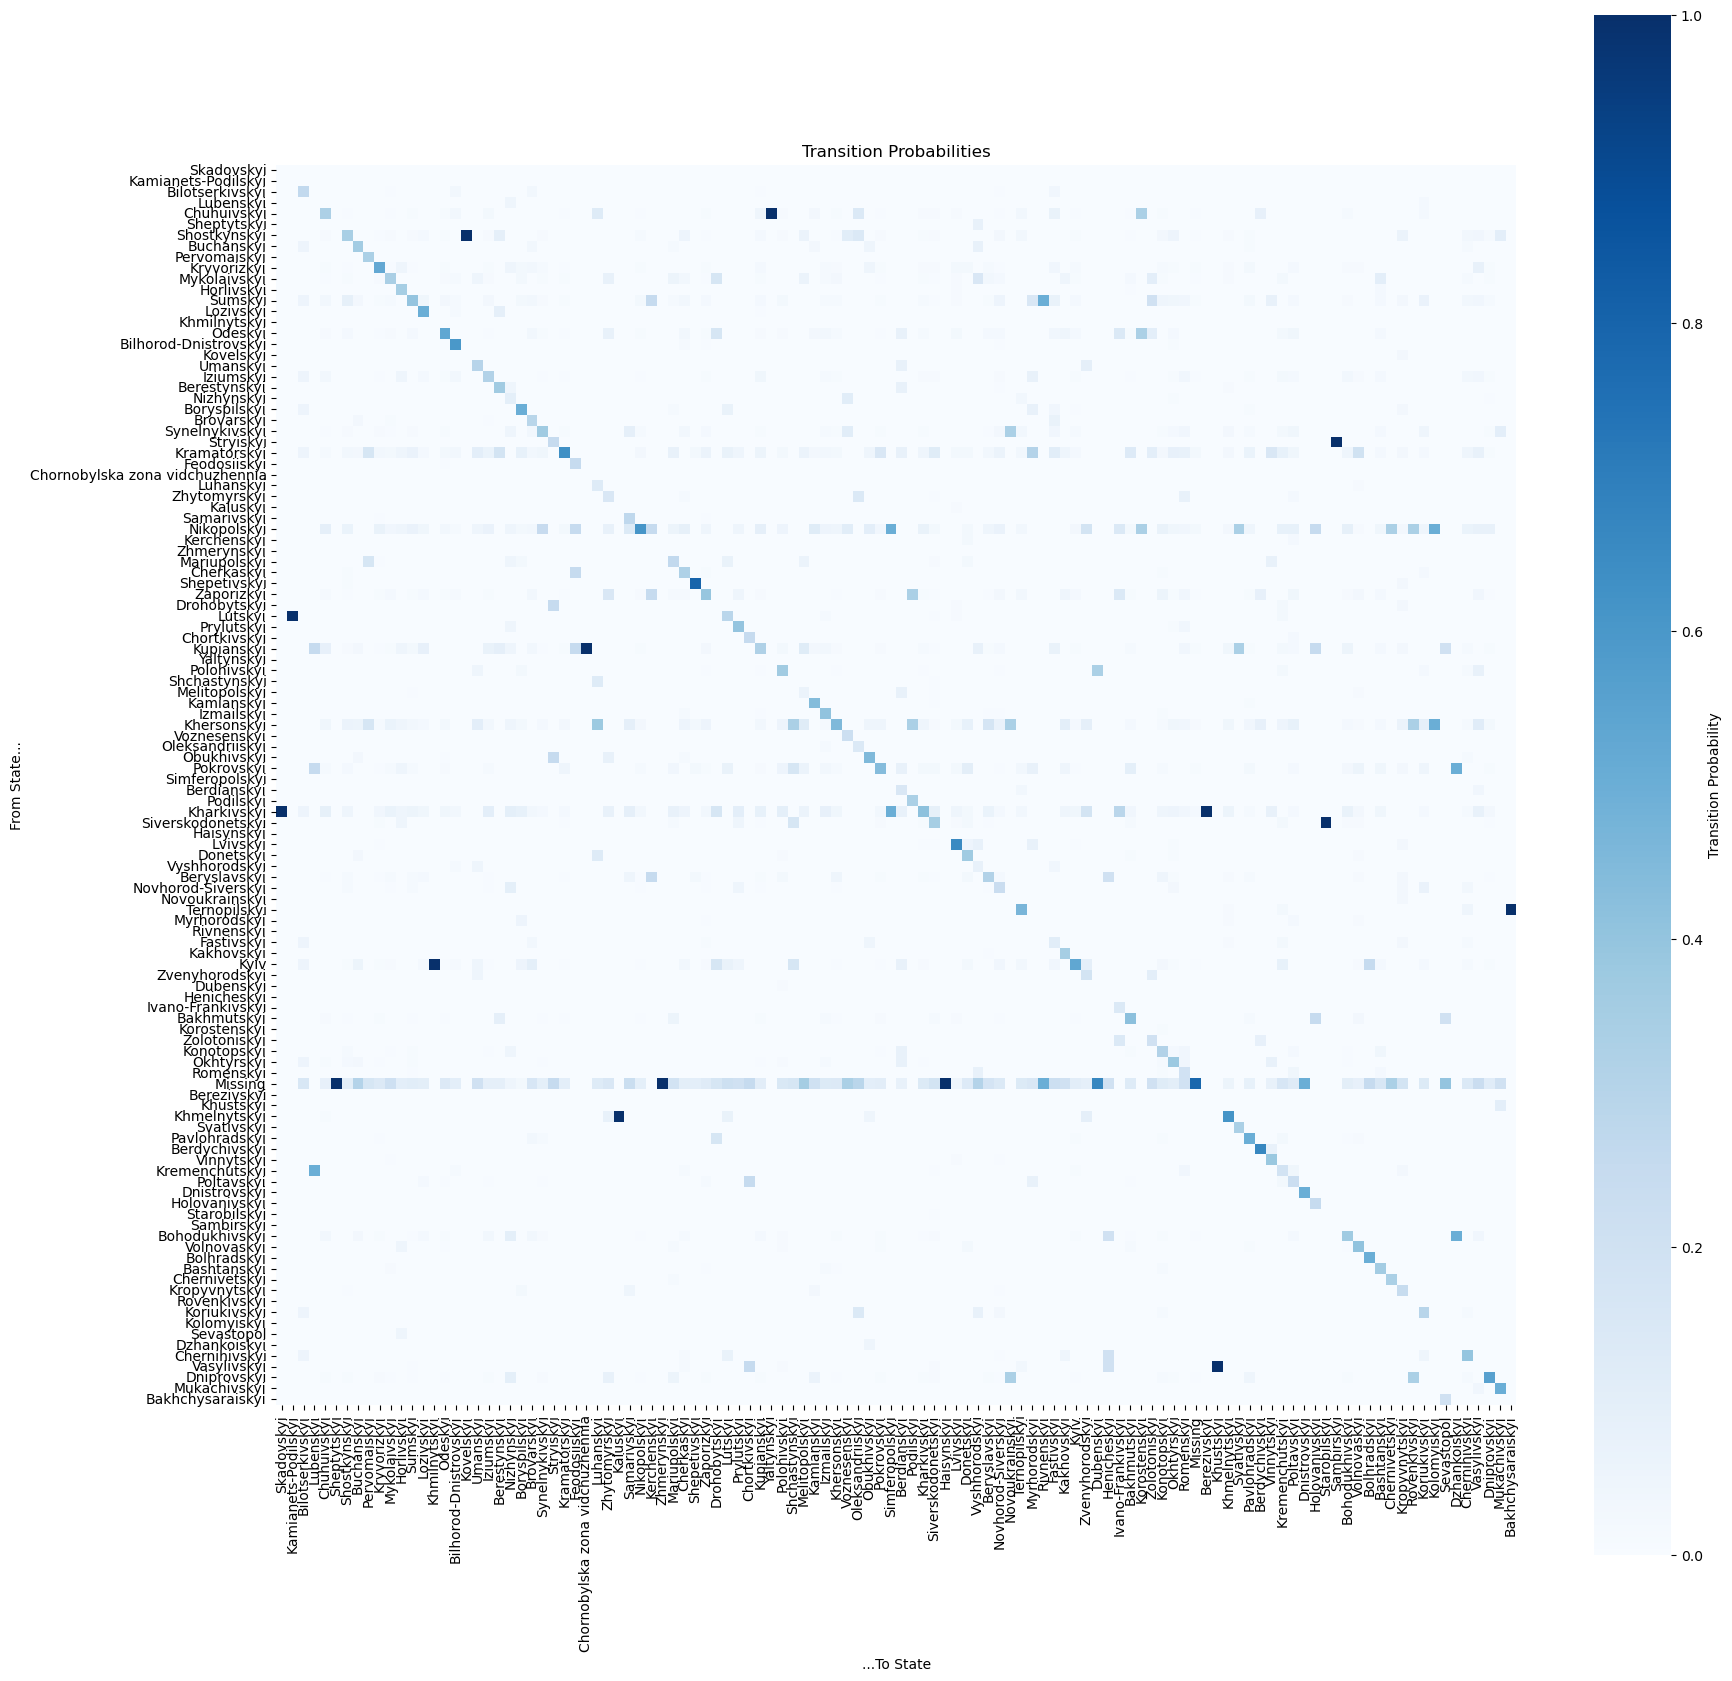

In [52]:
plt.figure(figsize=(20, 20))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=ray_states,
            yticklabels=ray_states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Infrastructure Markov Chain

What type of buildings are targeted? is there order?

In [ ]:
#how mayn type_of_infrastructure are NaN?
data['type_of_infrastructure'].isna().sum()

np.int64(4)

In [59]:
#Fill NaN with 'Unknown'
data['type_of_infrastructure'] = data['type_of_infrastructure'].fillna('Unknown')
data['type_of_infrastructure'].value_counts()

type_of_infrastructure
Industrial/Business/Enterprise facilities     5056
Education facility (school, etc.)             5021
Electricity supply system                     3016
Government facilities                         2060
Gas supply system                             1968
Cultural facilities (museum, theater etc.)    1210
Health facility (hospital, health clinic)     1169
Warehouse                                      834
Agricultural facilities                        805
Other                                          724
Railway                                        556
Water supply system                            280
Religious facilities                           277
Road / Highway                                 245
Heating and water facility                     244
Fuel depot                                     203
Telecommunications                             171
Bridge                                         146
Power plant                                     74
Harbor  

,damage_id,iso3,country,gid_1,oblast,rayon,type_of_infrastructure,if_other_what,date_of_event,source_name,source_date,source_link,additional_sources,extent_of_damage,_internal_filter_date,_weights,access_subindicator,pcode
0,D0011,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-25,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-25,0.7,['7.2'],UA44
1,D0012,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Partially damaged,2022-03-26,0.7,['7.2'],UA44
2,D0015,UKR,Ukraine,['UKR.14_1'],Lvivska,Missing,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Unknown,2022-03-26,1.0,['7.2'],UA46
3,D0016,UKR,Ukraine,['UKR.14_1'],Lvivska,Missing,Aircraft repair plant,Aircraft repair plan,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-26,1.0,['7.2'],UA46
4,D0017,UKR,Ukraine,['UKR.12_1'],Kyivska,Missing,Bridge,NaN,2022-03-22,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-22,1.0,['9.2'],UA32


In [61]:
infrastructure = data[['type_of_infrastructure']].copy()
infrastructure.reset_index(drop=True, inplace=True)
infrastructure

,type_of_infrastructure
0,Warehouse
1,Warehouse
2,Warehouse
3,Aircraft repair plant
4,Bridge
...,...
24264,"Health facility (hospital, health clinic)"
24265,Industrial/Business/Enterprise facilities
24266,Industrial/Business/Enterprise facilities
24267,Government facilities


In [62]:
#get unique rayons for the States space
infra_states = set(infrastructure.iloc[0])
for i in range(1, len(infrastructure)):
    transition_i = set(infrastructure.iloc[i])
    infra_states = infra_states.union(transition_i)
infra_states = list(infra_states)
infra_states

['Railway',
 'Oil depot',
 'Education facility (school, etc.)',
 'Religious facilities',
 'Unknown',
 'Nuclear unit',
 'Gas supply system',
 'Cultural facilities (museum, theater etc.)',
 'Electricity supply system',
 'Bridge',
 'Industrial/Business/Enterprise facilities',
 'Airport',
 'Chemical storage unit',
 'Agricultural facilities',
 'Road / Highway',
 'Aircraft repair plant',
 'Other',
 'Harbor',
 'Power plant',
 'Warehouse',
 'Telecommunications',
 'Health facility (hospital, health clinic)',
 'Water supply system',
 'Government facilities',
 'Heating and water facility',
 'Fuel depot']

In [63]:
#Now we need to modify the rayon df so the next rayon is in a new column "next_state"
infrastructure['Current_State'] = infrastructure['type_of_infrastructure']
infrastructure['Next_State'] = infrastructure['type_of_infrastructure'].shift(-1)
infrastructure_transition = infrastructure.dropna(subset=['Next_State'])
infrastructure_transition

,type_of_infrastructure,Current_State,Next_State
0,Warehouse,Warehouse,Warehouse
1,Warehouse,Warehouse,Warehouse
2,Warehouse,Warehouse,Aircraft repair plant
3,Aircraft repair plant,Aircraft repair plant,Bridge
4,Bridge,Bridge,Bridge
...,...,...,...
24263,"Cultural facilities (museum, theater etc.)","Cultural facilities (museum, theater etc.)","Health facility (hospital, health clinic)"
24264,"Health facility (hospital, health clinic)","Health facility (hospital, health clinic)",Industrial/Business/Enterprise facilities
24265,Industrial/Business/Enterprise facilities,Industrial/Business/Enterprise facilities,Industrial/Business/Enterprise facilities
24266,Industrial/Business/Enterprise facilities,Industrial/Business/Enterprise facilities,Government facilities


In [64]:
#Setting up the transition matrix
#S is the number of states
#tr_counts is the transition count matrix filled with zeros
S = len(infra_states)
tr_counts = np.zeros( (S, S) )

In [65]:
#Fill the transition count matrix
for i in range(len(infrastructure_transition)):
    current_state = infrastructure_transition.iloc[i]['Current_State']
    next_state = infrastructure_transition.iloc[i]['Next_State']
    
    current_index = infra_states.index(current_state)
    next_index = infra_states.index(next_state)
    
    tr_counts[current_index, next_index] += 1
print("Transition Counts Matrix:\n", tr_counts)

Transition Counts Matrix:
 [[2.810e+02 0.000e+00 3.500e+01 4.000e+00 0.000e+00 0.000e+00 1.200e+01
  9.000e+00 4.400e+01 1.000e+00 7.700e+01 0.000e+00 0.000e+00 4.000e+00
  5.000e+00 0.000e+00 1.200e+01 2.000e+00 0.000e+00 1.700e+01 6.000e+00
  9.000e+00 1.000e+00 3.400e+01 1.000e+00 2.000e+00]
 [1.000e+00 2.000e+00 3.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00
  2.000e+00 9.000e+00 1.000e+00 9.000e+00 1.000e+00 0.000e+00 2.000e+00
  2.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.000e+00 0.000e+00
  5.000e+00 1.000e+00 6.000e+00 0.000e+00 1.000e+00]
 [3.600e+01 7.000e+00 3.071e+03 3.900e+01 1.000e+00 3.000e+00 1.290e+02
  1.320e+02 2.340e+02 1.700e+01 5.310e+02 3.000e+00 3.000e+00 1.070e+02
  2.600e+01 0.000e+00 6.700e+01 7.000e+00 1.200e+01 8.800e+01 2.000e+01
  1.650e+02 2.500e+01 2.590e+02 2.100e+01 1.800e+01]
 [2.000e+00 0.000e+00 3.800e+01 5.100e+01 0.000e+00 0.000e+00 1.400e+01
  1.500e+01 2.500e+01 0.000e+00 6.500e+01 0.000e+00 0.000e+00 6.000e+00
  2.000e+00 0.000e+00 

In [66]:
#Now we need to normalize the transition counts to get probabilities
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[5.560e+02 5.100e+01 5.021e+03 2.770e+02 4.000e+00 7.000e+00 1.968e+03
  1.210e+03 3.016e+03 1.460e+02 5.056e+03 2.500e+01 5.300e+01 8.050e+02
  2.450e+02 3.000e+00 7.240e+02 6.700e+01 7.400e+01 8.330e+02 1.710e+02
  1.169e+03 2.800e+02 2.060e+03 2.440e+02 2.030e+02]]


In [67]:
#Continue to normalize by dividing each element by the sum of its column make sure we dont divide by zero
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=infra_states, columns=infra_states)
print(tr_df)

Transition Proportions:

                                            Railway  Oil depot  \
Railway                                        0.51       0.00   
Oil depot                                      0.00       0.04   
Education facility (school, etc.)              0.06       0.14   
Religious facilities                           0.00       0.00   
Unknown                                        0.00       0.00   
Nuclear unit                                   0.00       0.00   
Gas supply system                              0.03       0.08   
Cultural facilities (museum, theater etc.)     0.01       0.02   
Electricity supply system                      0.09       0.10   
Bridge                                         0.01       0.02   
Industrial/Business/Enterprise facilities      0.13       0.22   
Airport                                        0.00       0.02   
Chemical storage unit                          0.00       0.00   
Agricultural facilities                        0.01

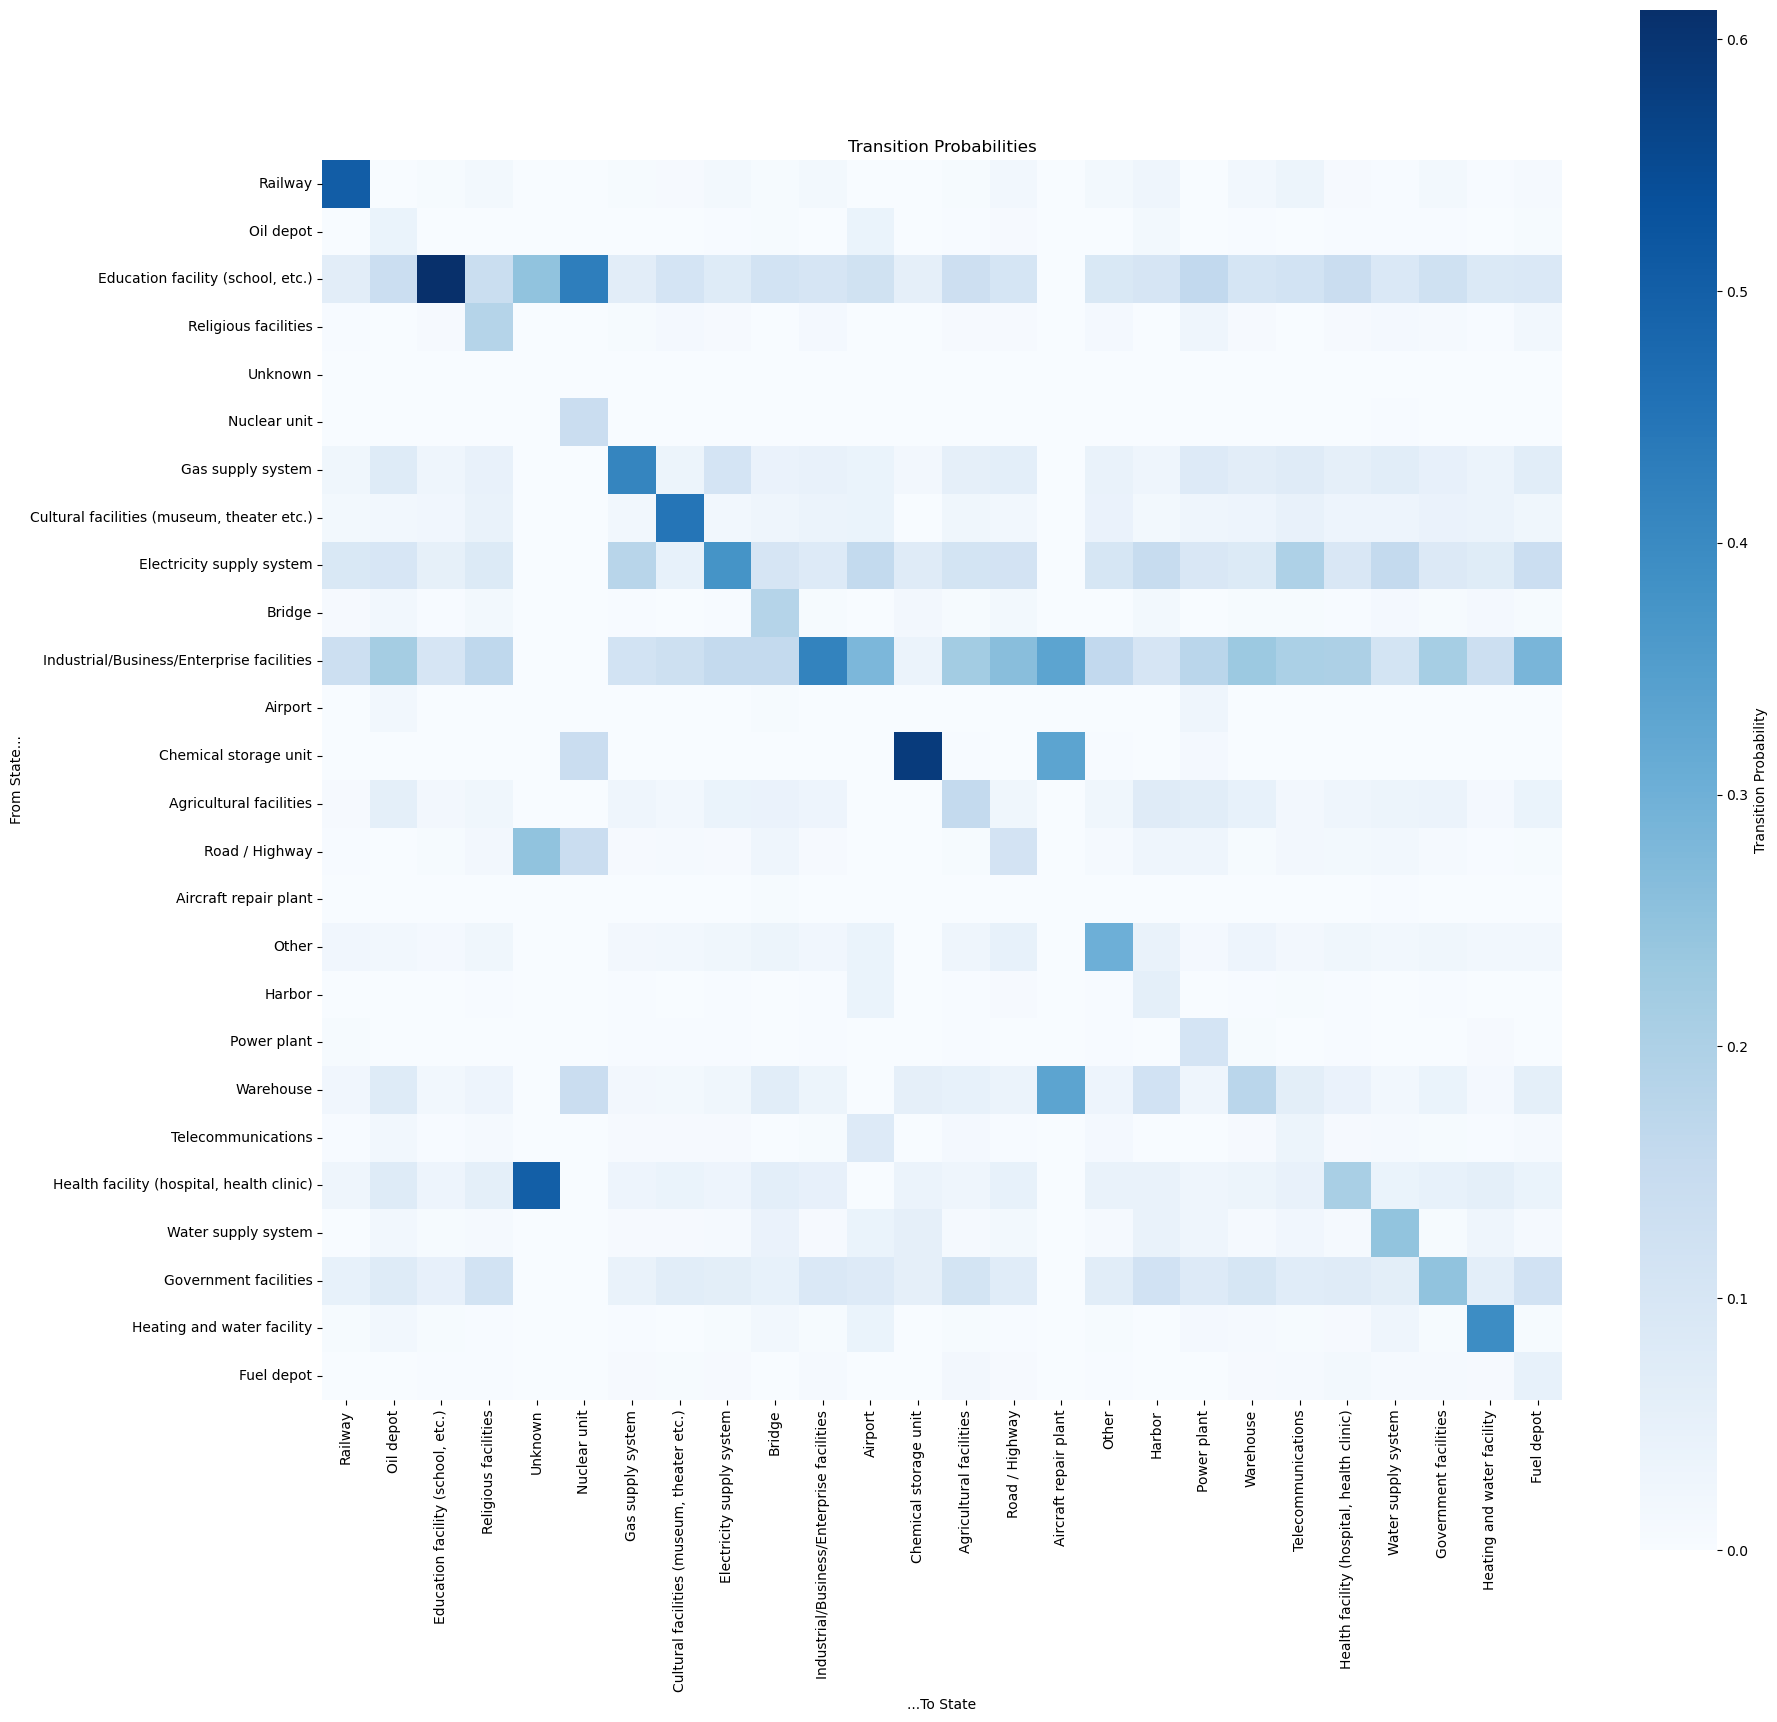

In [68]:
plt.figure(figsize=(20, 20))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=infra_states,
            yticklabels=infra_states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()